In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868


In [4]:
df.isnull().sum()

show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [6]:
df['director'].fillna('Unknown')
df['cast'].fillna('Unknown')
df['genres'].fillna('Unknown')
df["country"].fillna("Unknown")

0                        United States of America
1        United Kingdom, United States of America
2        United Kingdom, United States of America
3                        United States of America
4                        United States of America
                           ...                   
15995                                       Chile
15996                                      Russia
15997                                     Unknown
15998                                     Unknown
15999                    United States of America
Name: country, Length: 16000, dtype: object

In [7]:
#df = df.drop('show_id', axis=1)#
df = df.drop('duration', axis=1)


In [8]:
df =  df.drop_duplicates()


In [9]:

def shorten_number(num):
    if pd.isnull(num):
        return num
    if num >= 1_000_000_000:
        return f"{num/1_000_000_000:.1f}B"
    elif num >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return str(num)

df['budget_short'] = df['budget'].apply(shorten_number)
df['revenue_short'] = df['revenue'].apply(shorten_number)



In [10]:
df["cast"].unique()

array(['Mike Myers, Eddie Murphy, Cameron Diaz, Antonio Banderas, Walt Dohrn',
       'Leonardo DiCaprio, Joseph Gordon-Levitt, Ken Watanabe, Tom Hardy, Elliot Page',
       'Daniel Radcliffe, Emma Watson, Rupert Grint, Toby Jones, Helena Bonham Carter',
       ...,
       'Jessa Flux, Lynn Lowry, Angel Nichole Bradford, Melissa Heflin, Anna Clary',
       'Riley G, Mitchel Corrado',
       "Trey Holland, Keith David, Richard Kind, Michael McDonald, Romina D'Ugo"],
      shape=(15640,), dtype=object)

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')



In [12]:

#df['rating'] = df['rating'].astype(int)

#df['popularity'] = df['popularity'].astype(int)#

#df['budget_million'] = (df['budget_short'] %1_000_000).astype(int)
#df['revenue_million'] = (df['revenue_short'] % 1_000_000).astype(int)

# Convert to numeric safely
#df['budget'] = pd.to_numeric(df['budget_short'], errors='coerce')
#df['revenue'] = pd.to_numeric(df['revenue_short'], errors='coerce')



In [13]:
df["language"].unique()

array(['en', 'es', 'sr', 'pt', 'ko', 'fr', 'hi', 'ja', 'th', 'no', 'de',
       'zh', 'it', 'fi', 'cn', 'sv', 'is', 'ta', 'nl', 'da', 'ru', 'tr',
       'el', 'te', 'bn', 'ar', 'ca', 'fa', 'ro', 'he', 'cs', 'hu', 'pl',
       'ml', 'ms', 'id', 'ku', 'xx', 'tl', 'gl', 'lt', 'si', 'et', 'hr',
       'ps', 'mi', 'uk', 'af', 'km', 'mr', 'sk', 'kn', 'eu', 'lv', 'la',
       'dz', 'kk', 'mk', 'ka', 'vi', 'mn', 'pa', 'ga', 'yo', 'zu', 'ky',
       'ur', 'kl', 'ht', 'am', 'ne', 'hy', 'sl', 'bg'], dtype=object)

In [14]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average,budget,revenue,budget_short,revenue_short
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.38,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38,165000000,752600867,165.0M,752.6M


<function matplotlib.pyplot.show(close=None, block=None)>

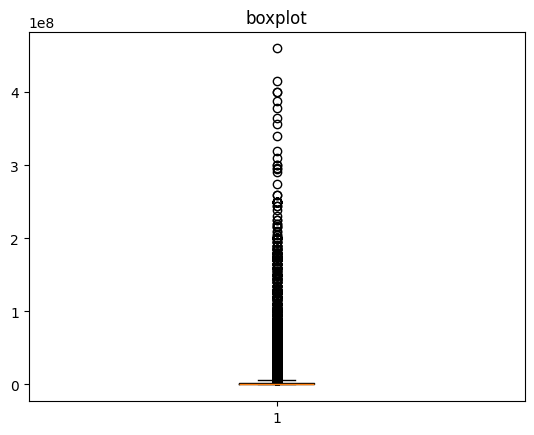

In [15]:
plt.boxplot(df["budget"])
plt.title('boxplot')
plt.show


In [24]:
num_cols = ["vote_count", "vote_average", "popularity", "budget", "revenue"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [17]:
df["budget"].unique

<bound method Series.unique of 0        165000000
1        160000000
2        250000000
3        260000000
4        165000000
           ...    
15995            0
15996            0
15997            0
15998            0
15999            0
Name: budget, Length: 16000, dtype: int64>

In [25]:
df.to_csv("clean_netflix_movies_detailed_up_to_2025.csv", index=False)